# Scott Breitbach
## Project 1: Microbe Identification
## Testing

In [1]:
## Load Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
# transformations:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
# visualize correlation
from yellowbrick.features import Rank2D 
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Load data

In [2]:
# import files to colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving microbes.csv to microbes.csv
User uploaded file "microbes.csv" with length 4274226 bytes


In [3]:
def load_dataframe(path):
  # load dataset as pandas DataFrame
  DF = pd.read_csv(path, index_col=0)
  return DF

# load the dataframe
microbeDF = load_dataframe('/content/microbes.csv')

In [4]:
# Look at list of organism names
microbeDF.microorganisms.unique()

array(['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Raizopus',
       'Penicillum', 'Aspergillus sp', 'Protozoa', 'Diatom', 'Ulothrix'],
      dtype=object)

# Clean Data

### Remove duplicate column

In [5]:
# remove 'ConvexHull2' (identical to 'ConvexHull1')
if microbeDF.ConvexHull1.equals(microbeDF.ConvexHull2):
  microbeDF = microbeDF.drop('ConvexHull2', axis=1)

### Look at summary stats

In [5]:
# get a look at the data
microbeDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Solidity,30527.0,9.677744,4.063437,0.0,6.5700,9.3500,12.6000,23.0
Eccentricity,30527.0,19.466921,3.479828,0.0,17.3000,20.7000,22.2000,23.0
EquivDiameter,30527.0,3.633348,2.210851,0.0,2.1800,3.3800,4.5800,23.0
Extrema,30527.0,11.871832,6.045135,0.0,6.7900,12.0000,17.2000,23.0
FilledArea,30527.0,0.420022,0.875091,0.0,0.0937,0.2290,0.4345,23.0
Extent,30527.0,5.840625,3.250999,0.0,3.2800,5.2600,7.8500,23.0
Orientation,30527.0,11.751004,6.575319,0.0,6.0050,12.1000,17.2000,23.0
EulerNumber,30527.0,22.380901,0.962906,0.0,22.3000,22.6000,22.9000,23.0
BoundingBox1,30527.0,10.919027,6.093280,0.0,5.6900,10.9000,15.8000,23.0
BoundingBox2,30527.0,10.399429,5.797144,0.0,5.7300,10.0000,14.9000,23.0


### Look at data distribution

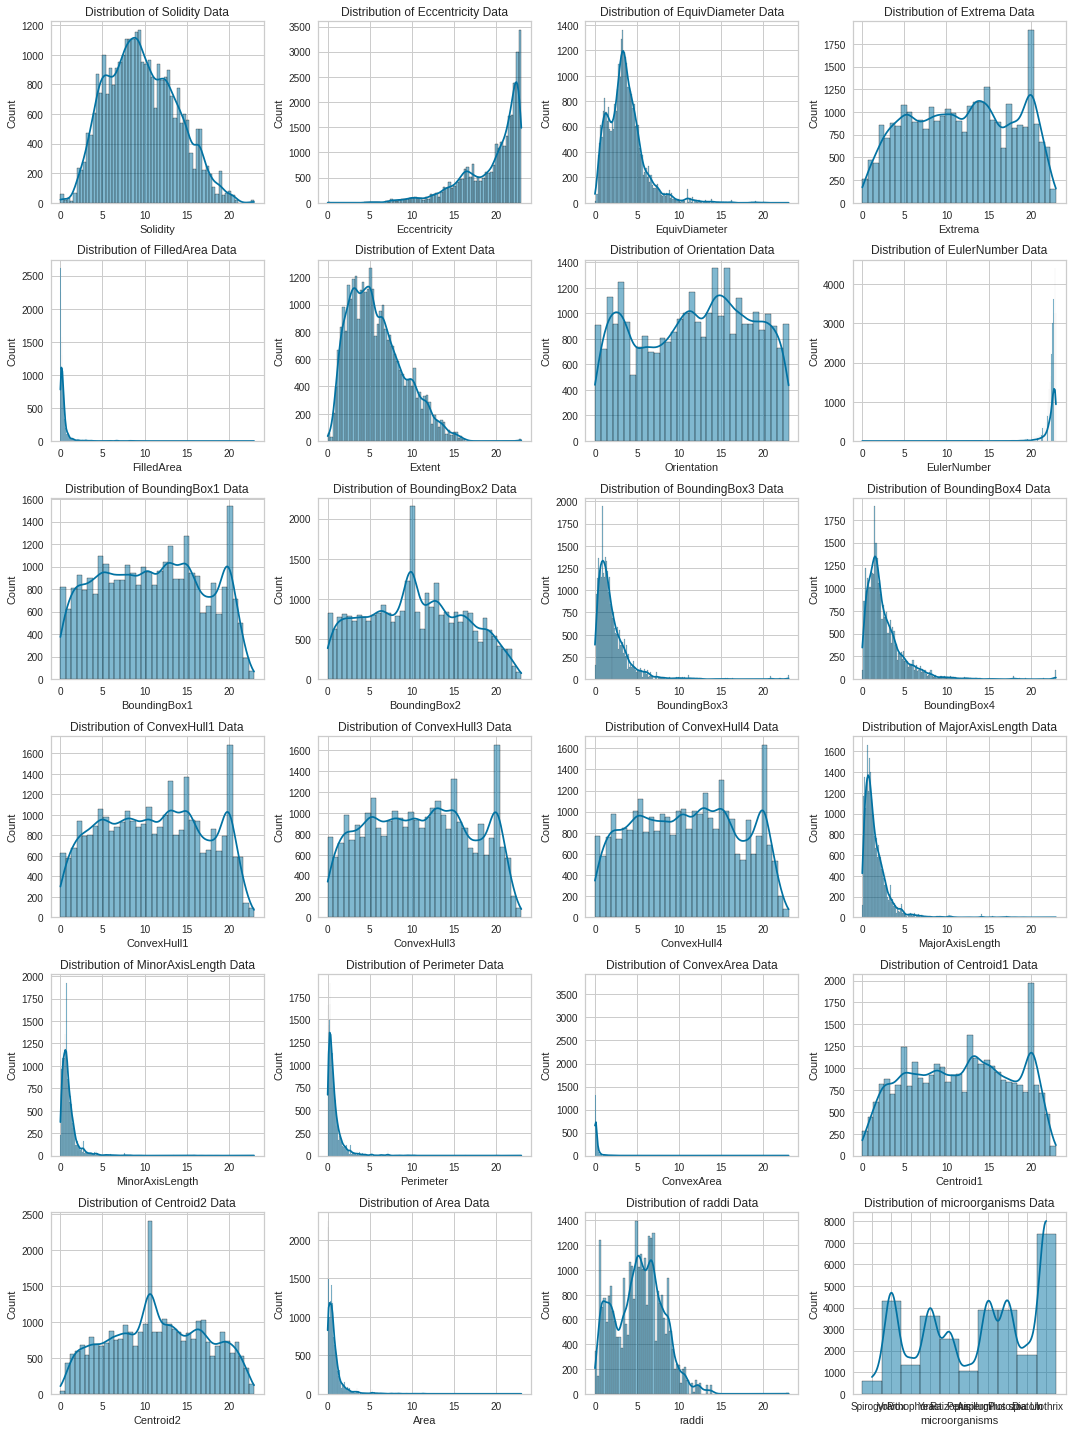

CPU times: user 49.3 s, sys: 2.83 s, total: 52.1 s
Wall time: 54.7 s


In [6]:
%%time
# Look at data distribution by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(microbeDF.columns, 1):
  plt.subplot(6, 4, i)
  plt.title(f'Distribution of {col} Data')
  sns.histplot(microbeDF[col], kde=True)
  plt.tight_layout()
  plt.plot()
plt.show()

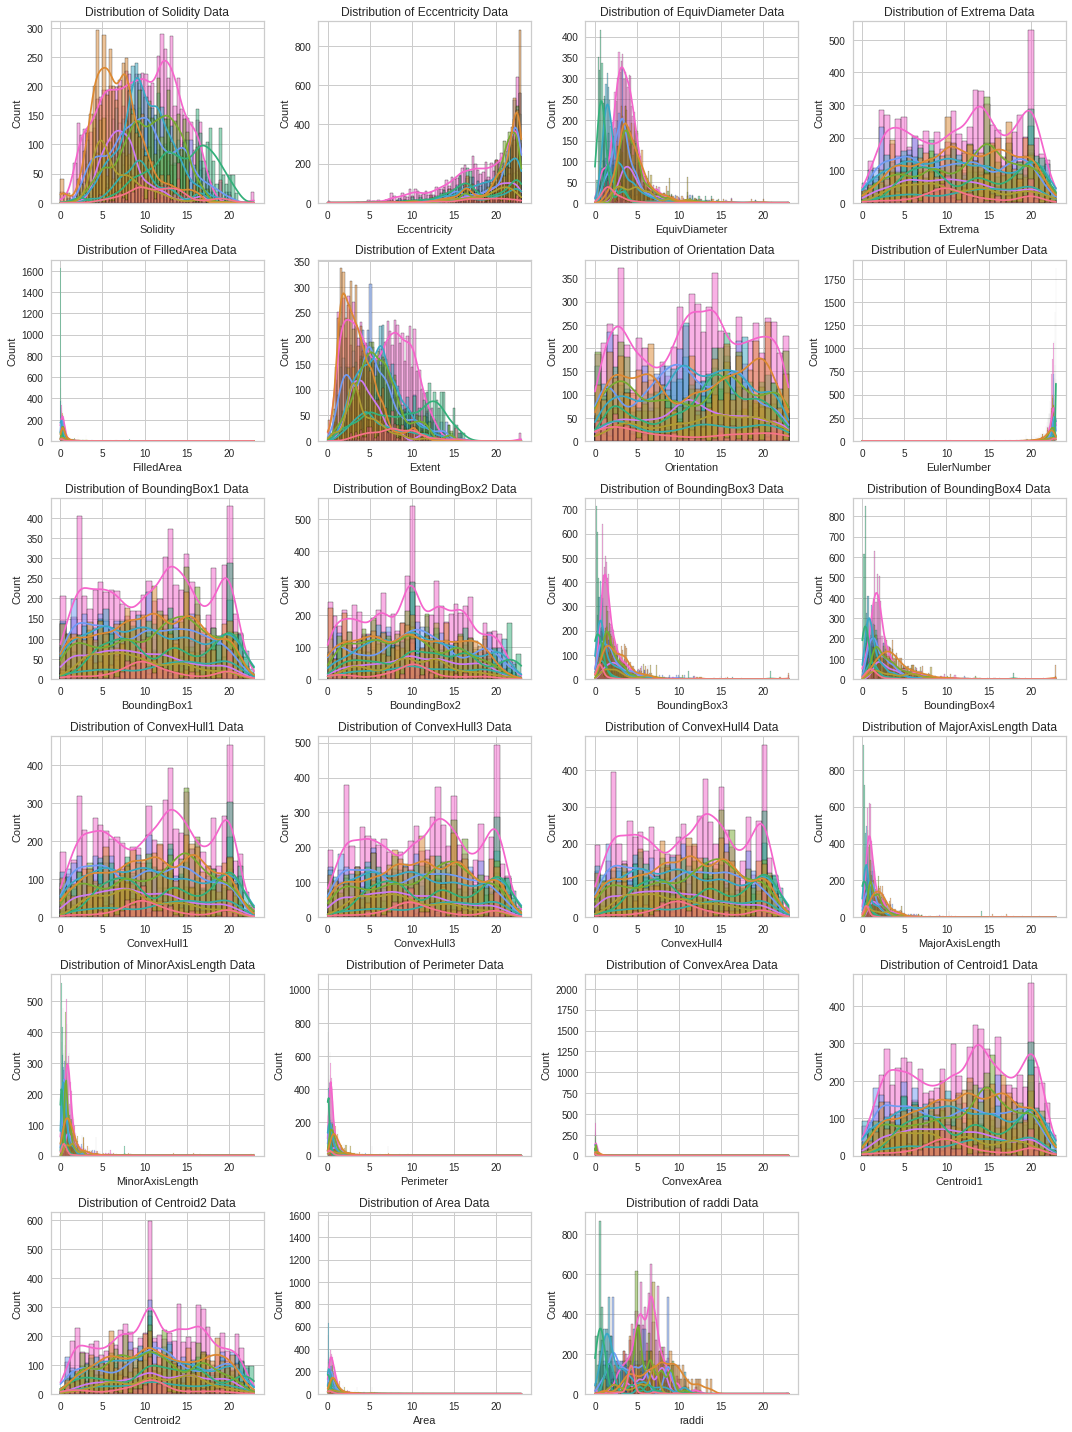

In [6]:
%%time
# Look at histograms by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(microbeDF.columns[:-1], 1):
  plt.subplot(6, 4, i)
  plt.title(f'Distribution of {col} Data')
  sns.histplot(data=microbeDF, x=col, kde=True, hue='microorganisms', legend=False)
  plt.tight_layout()
  plt.plot()
plt.show()

Histograms show a lot of skewed variables as well as strong similarities between some variables.

CPU times: user 3min 35s, sys: 5.33 s, total: 3min 41s
Wall time: 3min 42s


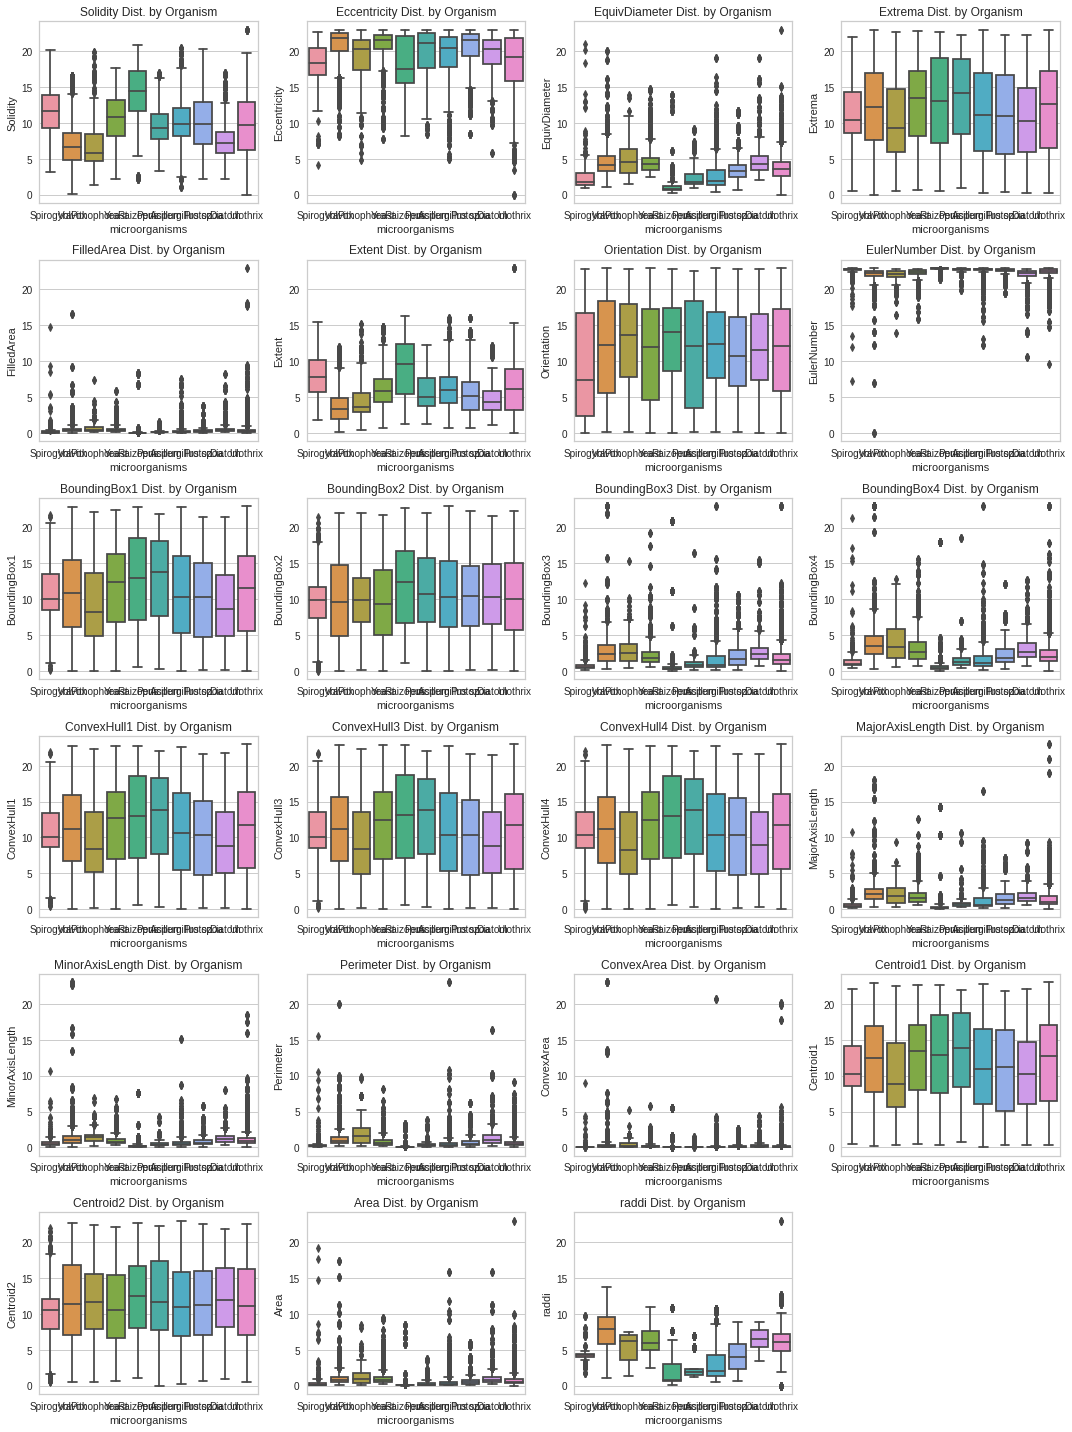

CPU times: user 19.9 s, sys: 358 ms, total: 20.2 s
Wall time: 20.7 s


In [7]:
%%time
# Look at box plots by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(microbeDF.columns[:-1], 1):
  plt.subplot(6, 4, i)
  plt.title(f'{col} Dist. by Organism')
  sns.boxplot(y=microbeDF[col], x=microbeDF['microorganisms'])
  plt.tight_layout()
  plt.plot()
plt.show()

Lots of data points at the extremes (0 and 23). These values don't make sense for a lot of the variables and are likely outliers and should be removed.

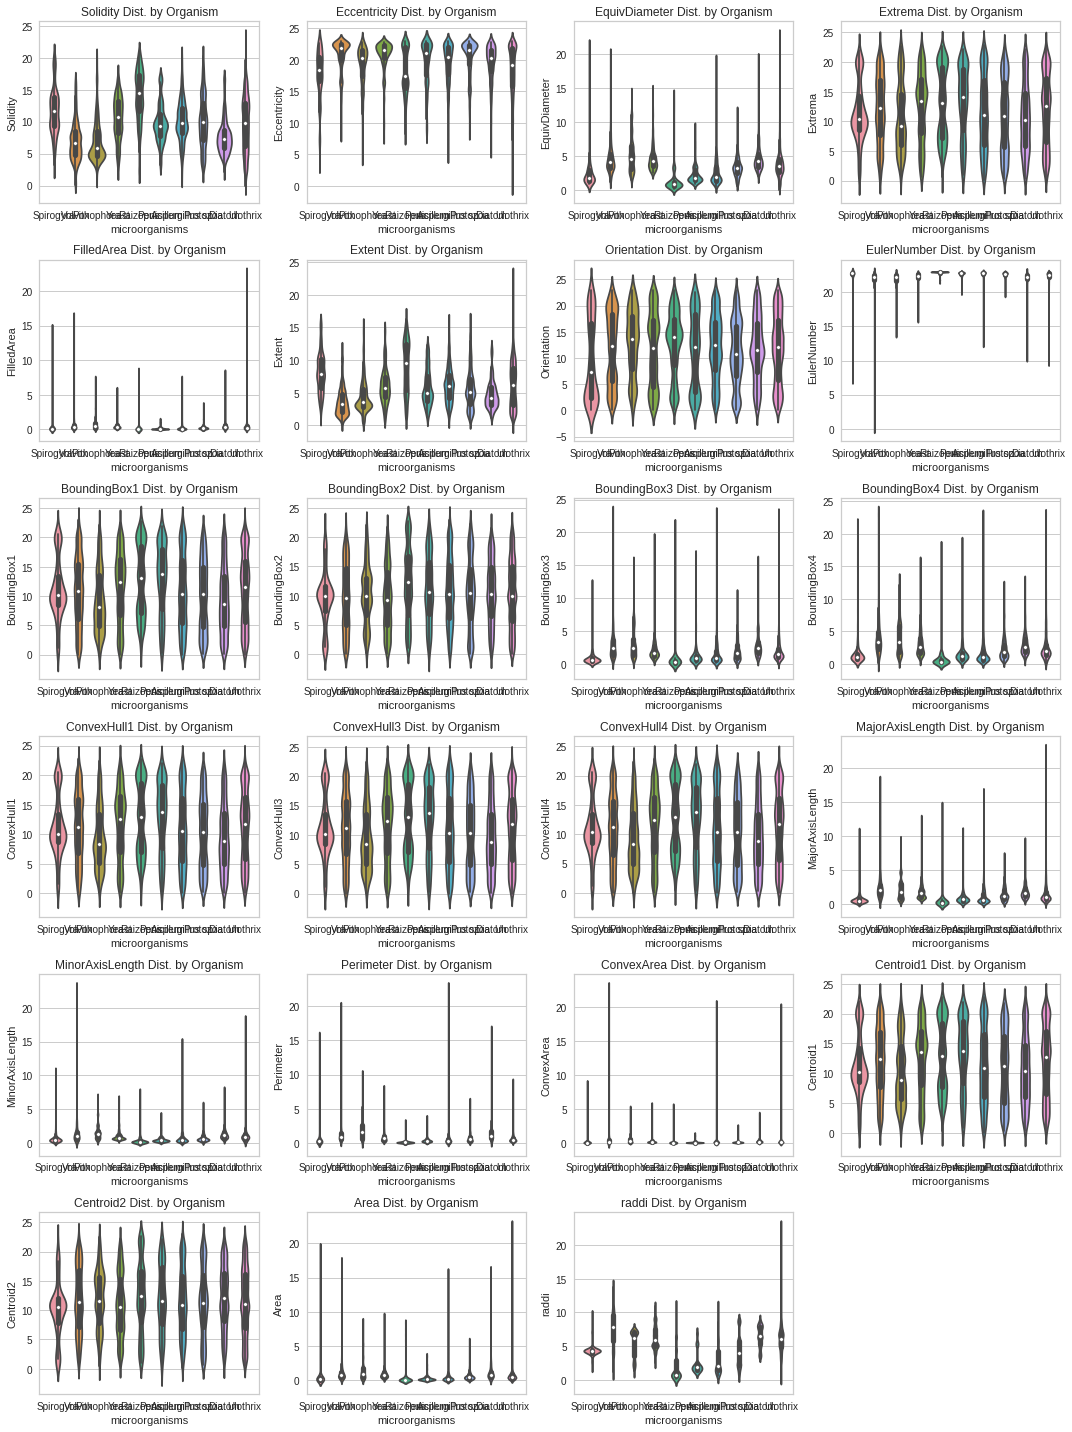

CPU times: user 15.1 s, sys: 372 ms, total: 15.4 s
Wall time: 15.2 s


In [11]:
%%time
# Look at data distribution by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(microbeDF.columns[:-1], 1):
  plt.subplot(6, 4, i)
  plt.title(f'{col} Dist. by Organism')
  sns.violinplot(y=microbeDF[col], x=microbeDF['microorganisms'])
  plt.tight_layout()
  plt.plot()
plt.show()

### Remove 0s and 23s from select variables

In [ ]:
# How many 0's in each column?
for i in microbeDF.columns:
  print(f'{i}: {len(microbeDF[microbeDF[i] == 0])}')

In [ ]:
# How many 23's in each column?
for i in microbeDF.columns:
  print(f'{i}: {len(microbeDF[microbeDF[i] == 23])}')

In [12]:
def remove_zeros(df):
  '''drops rows containing '0' from a specified column'''
  # columns from which to remove zeros
  noZeros = ['Solidity', 'Eccentricity', 'EquivDiameter', 
           'FilledArea', 'Extent', 'EulerNumber', 
           'BoundingBox4', 'BoundingBox4', 'BoundingBox4', 'BoundingBox4',
           'ConvexHull1', 'ConvexHull3', 'ConvexHull4',
           'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 
           'ConvexArea','raddi', 'Area']
  # Remove rows w/0s from specified columns
  for i in noZeros:
    df = df[df[i] != 0]
  return df

def remove_23s(df):
  '''drops rows containing '23' from a specified column'''
  # columns from which to remove 23s
  remove23s = ['Solidity', 'EquivDiameter', 'FilledArea', 'Extent', 
             'BoundingBox3', 'BoundingBox4', 'MajorAxisLength', 
             'MinorAxisLength', 'Perimeter', 'ConvexArea', 'raddi', 'Area']
  # Remove rows w/0s from specified columns
  for i in remove23s:
    df = df[df[i] != 23]
  return df

# drop rows containing 0 from specified columns
microbeDF = remove_zeros(microbeDF)
# drop rows containing 23 from specified columns
microbeDF = remove_23s(microbeDF)  

Look for Correlations

In [13]:
# Look for correlations
microbeDF.corr()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
Solidity,1.000000,-0.340273,-0.449488,0.070680,-0.284949,0.895822,-0.095078,0.384486,0.169335,0.092924,...,0.157757,0.158736,-0.632885,-0.506991,-0.531845,-0.437802,0.077682,-0.021711,-0.361167,-0.485136
Eccentricity,-0.340273,1.000000,0.043366,-0.051519,-0.065717,-0.532874,0.070241,-0.022737,-0.089296,-0.047687,...,-0.084943,-0.084398,0.315545,-0.183183,0.088723,0.031325,-0.058264,-0.011462,0.010041,0.109285
EquivDiameter,-0.449488,0.043366,1.000000,0.025703,0.750206,-0.366061,0.005257,-0.853760,-0.110754,-0.171856,...,-0.095762,-0.099856,0.800497,0.831785,0.837899,0.762063,0.019176,-0.020148,0.920676,0.563700
Extrema,0.070680,-0.051519,0.025703,1.000000,0.012317,0.072623,0.016004,-0.060852,0.972024,0.015187,...,0.973322,0.972874,-0.009916,0.009218,0.008346,0.002520,0.987760,0.012962,0.019626,-0.003297
FilledArea,-0.284949,-0.065717,0.750206,0.012317,1.000000,-0.210620,0.017035,-0.682191,-0.106023,-0.117147,...,-0.093432,-0.096587,0.642244,0.755408,0.638433,0.785790,0.002288,-0.005130,0.846406,0.296003
Extent,0.895822,-0.532874,-0.366061,0.072623,-0.210620,1.000000,-0.122330,0.305522,0.164400,0.071781,...,0.151900,0.153204,-0.589945,-0.344829,-0.437838,-0.344251,0.081608,-0.033945,-0.283703,-0.422741
Orientation,-0.095078,0.070241,0.005257,0.016004,0.017035,-0.122330,1.000000,-0.017904,-0.042740,-0.018380,...,-0.032503,-0.040487,0.049155,0.041578,0.036372,0.051606,-0.037882,-0.007934,0.017382,0.006513
EulerNumber,0.384486,-0.022737,-0.853760,-0.060852,-0.682191,0.305522,-0.017904,1.000000,0.058363,0.145236,...,0.045096,0.049613,-0.674480,-0.760334,-0.884026,-0.780438,-0.051399,0.004188,-0.906769,-0.417371
BoundingBox1,0.169335,-0.089296,-0.110754,0.972024,-0.106023,0.164400,-0.042740,0.058363,1.000000,0.039573,...,0.998515,0.998867,-0.173204,-0.104490,-0.129588,-0.127739,0.986202,0.016391,-0.117156,-0.083687
BoundingBox2,0.092924,-0.047687,-0.171856,0.015187,-0.117147,0.071781,-0.018380,0.145236,0.039573,1.000000,...,0.034975,0.036109,-0.150051,-0.144729,-0.147247,-0.143518,0.020792,0.980850,-0.154463,-0.139309


In [9]:
%%time
# Look at correlation matrix of variables
sns.pairplot(microbeDF)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

`ConvexHull1` and `ConvexHull2` appear almost perfectly correlated.  
`EquivDiameter` and `Area` appear to have a strong, almost logarithmic correlation. Perhaps one is derived from the other. Note: upon further inspection, I anticipated this in my Milestone 1 Proposal: `EquivDiameter` is the diameter of a circle with an equivalent area to the microorganism and so:  
> `Area` = pi * (0.5 `EquivDiameter`)^2  

Some of the scatterplots appear evenly distributed (with no correlation), which is curious. I'm going to plot again, this time coloring based on microorganism name.


In [14]:
%%time
sns.pairplot(microbeDF, kind='scatter', hue='microorganisms')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Blue (Ulothrix) appears to dominate. I'm not sure if that's because there's just so much more data for that organism or if it's because it was last in the dataset. there do appear to be some clusters of other colors, which is good to see as it may help to differentiate between the organisms.

In [15]:
# pip install fastcluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 194 kB 7.6 MB/s 


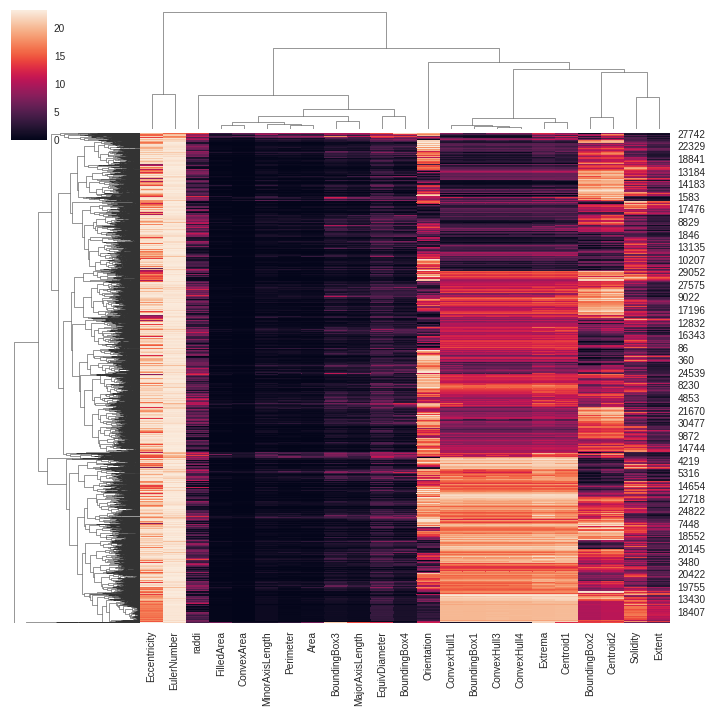

CPU times: user 38.3 s, sys: 3.88 s, total: 42.2 s
Wall time: 51.4 s


In [16]:
%%time
# Dendrogram & heatmap
sns.clustermap(microbeDF[microbeDF.columns[:-1]])
plt.show()

### Split data into features (X)/target (y) and train/test sets

In [17]:
def load_dataset(DF):
  # retrieve numpy array
  dataset = DF.values
  # split into input (X) and output (y) variables
  X, y = dataset[:, :-1], dataset[:,-1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  return X, y

# load the dataset
X, y = load_dataset(microbeDF)

# split into train and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1) # making test set 1/3 of data

# summarize
print('Train:', X_train_raw.shape, y_train.shape)
print('Test: ', X_test_raw.shape, y_test.shape)

Train: (20311, 23) (20311,)
Test:  (10004, 23) (10004,)


Look at skew:

In [26]:
positiveSkew = ['EquivDiameter', 'FilledArea', 'Extent', 'BoundingBox3', 
                'BoundingBox4', 'MajorAxisLength', 'MinorAxisLength', 
                'Perimeter', 'ConvexArea']
negativeSkew = ['Eccentricity', 'EulerNumber']

In [27]:
from scipy.stats import skew

# Measure skew
print("Positive Skew-")
for i in positiveSkew:
  print(f' {i}: {round(skew(microbeDF[i]), 2)}')

print("\nNegative Skew-")
for i in negativeSkew:
  print(f' {i}: {round(skew(microbeDF[i]), 2)}')

Positive Skew-
 EquivDiameter: 1.51
 FilledArea: 8.63
 Extent: 0.67
 BoundingBox3: 3.18
 BoundingBox4: 2.33
 MajorAxisLength: 2.73
 MinorAxisLength: 3.33
 Perimeter: 4.43
 ConvexArea: 7.18

Negative Skew-
 Eccentricity: -1.31
 EulerNumber: -4.89


### Fix skew in data using Box-Cox transformation

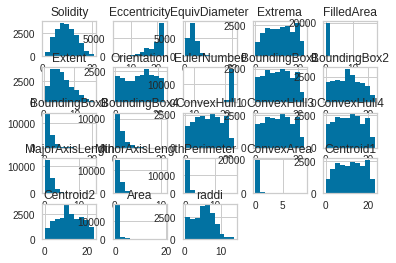

In [10]:
# Look at distributions pre-transformation
dataset = pd.DataFrame(X_train_raw, columns=microbeDF.columns[:-1])
dataset.hist()
plt.show()

In [28]:
## Transform features:

# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2)) # data must be >0 for Box-Cox
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

# data = pipeline.fit_transform(data)
X_train = pipeline.fit_transform(X_train_raw)
X_test = pipeline.transform(X_test_raw)

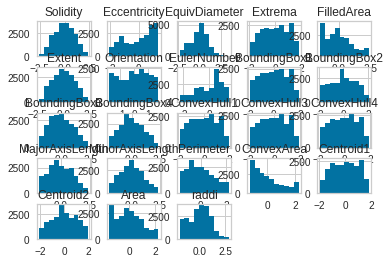

In [12]:
# Look at distributions post-transformation
dataset = pd.DataFrame(X_train, columns=microbeDF.columns[:-1])
dataset.hist()
plt.show()

### Rebalance training data using oversampling / undersampling

In [ ]:
microbeDF.microorganisms.value_counts()

In [15]:
# # example of random oversampling to balance the class distribution
# from collections import Counter

# # summarize class distribution
# print(Counter(y_train))

# # get an average class size
# balancedNum = int(round(len(y_train)/10, 0))
# balancedNum

# # set up dictionary of classes to resample (< average number of samples)
# resampleDict = {}
# for i in np.unique(y_train):
#   if Counter(y_train)[i] < balancedNum:
#     resampleDict[i] = balancedNum

# ## Oversampling
# from imblearn.over_sampling import RandomOverSampler
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy=resampleDict)
# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(X_train, y_train)
# # summarize class distribution
# print(Counter(y_over))

# ## Undersampling
# from imblearn.under_sampling import RandomUnderSampler
# # define oversampling strategy
# undersample = RandomUnderSampler(sampling_strategy='auto')
# # fit and apply the transform
# # X_under, y_under = undersample.fit_resample(X_over, y_over)
# X_train, y_train = undersample.fit_resample(X_over, y_over)
# # summarize class distribution
# # print(Counter(y_under))
# print(Counter(y_train))

Counter({'Ulothrix': 4930, 'Volvox': 2785, 'Protozoa': 2629, 'Aspergillus sp': 2589, 'Yeast': 2424, 'Raizopus': 1688, 'Diatom': 1267, 'Pithophora': 887, 'Penicillum': 715, 'Spirogyra': 397})


### Look for correlations

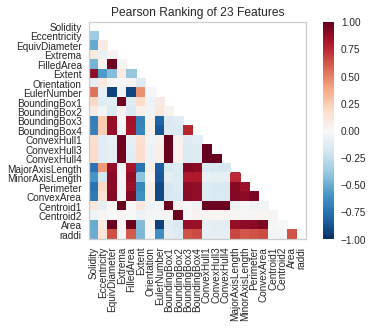

In [24]:
## Pearson ranking
# extract the feature names from the DataFrame
num_features = microbeDF.columns[:-1]
# combine transformed train & test sets
data = np.concatenate((X_train, X_test), axis=0)

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(data)  # Fit the data to the visualizer
visualizer.transform(data)  # Transform the data
visualizer.poof() # Draw/show/poof the data

Several groups of features appear to be highly correlated, such as:  
* 'Area' with 'EquivDiameter' and 'FilledArea' and to a lesser extent: 
 * 'BoundingBox3', 'BoundingBox4', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', and 'ConvexArea' 
 * 'EulerNumber' appears to have a relatively strong negative correlation with this group
* 'Extrema' with 'BoundingBox1', 'ConvexHull1', 'ConvexHull3', 'ConvexHull4', and 'Centroid1'
* 'Centroid2' with 'BoundingBox2'

In [19]:
%%time
## LOOK FOR FEATURES WITH LOW VARIANCE 
# (i.e. containing little information)

# Load libraries
from sklearn.feature_selection import VarianceThreshold

# Create features and target
features = microbeDF.select_dtypes(include='number')
target = microbeDF.microorganisms

# Create thresholder
thresholder = VarianceThreshold(threshold=0.01)

# Create high-variance feature matrix
features_high_variance = thresholder.fit_transform(features)

# Look at features, sorted by variance (highest to lowest)
d = {'Column': microbeDF.columns[:-1], 'Variance': thresholder.fit(features).variances_}
varianceDF = pd.DataFrame(d).sort_values('Variance', ascending=False)
varianceDF

CPU times: user 37.2 ms, sys: 2.03 ms, total: 39.2 ms
Wall time: 41.9 ms


Low variance may indicate that a feature doesn't contain much information that is useful for predicting the target variable.

In [20]:
%%time 
## LOOK AT HIGHLY CORRELATED FEATURES
# (i.e. likely to be redundant)

# Create features and target
features = microbeDF.select_dtypes(include='number')
target = microbeDF.microorganisms

# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                 k=1).astype(bool))

# Find index of feature columns with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Features to drop
print("Features with high correlation:\n", to_drop)

Features with high correlation:
 ['BoundingBox1', 'ConvexHull1', 'ConvexHull3', 'ConvexHull4', 'Centroid1', 'Centroid2']
CPU times: user 91.5 ms, sys: 2.75 ms, total: 94.2 ms
Wall time: 179 ms


In [21]:
# again with 90% threshold
[column for column in upper.columns if any(upper[column] > 0.90)]

['BoundingBox1',
 'ConvexHull1',
 'ConvexHull3',
 'ConvexHull4',
 'MajorAxisLength',
 'Centroid1',
 'Centroid2',
 'Area']

[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)

In [22]:
## USE CHI-SQUARED TO FIND THE MOST INFORMATIVE FEATURES

# Load libraries
# from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile

# Create features and target
features = microbeDF.select_dtypes(include='number')
target = microbeDF.microorganisms

# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75) # also try chi2 & mutual_info_classif
features_kbest = fvalue_selector.fit_transform(features, target)

# Look at first row of best features
features_kbest[0]

array([10.7  , 15.8  ,  5.43 ,  0.785,  8.14 , 22.3  ,  2.97 ,  1.75 ,
        2.97 ,  2.97 ,  2.97 ,  1.34 ,  1.61 ,  0.683,  0.195,  1.31 ,
        7.99 ])

[Recursive Feature Elimination](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py)

Note: this takes 2+ hours

In [ ]:
# %%time
# from sklearn.svm import SVC
# # from sklearn.datasets import load_digits
# from sklearn.feature_selection import RFE
# import matplotlib.pyplot as plt

# # # Load the dataset
# # num_features = microbeDF.columns[:-1]
# # X = microbeDF[num_features].values
# # y = microbeDF.microorganisms

# # Create the RFE object and rank each pixel
# svc = SVC(kernel="linear", C=1)
# rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
# rfe.fit(X, y)
# # ranking = rfe.ranking_.reshape(digits.images[0].shape)

# # Plot pixel ranking
# plt.matshow(ranking, cmap=plt.cm.Blues)
# plt.colorbar()
# plt.title("Ranking of pixels with RFE")
# plt.show()

In [ ]:
# # print table of ranked features
# svcDF = pd.DataFrame()
# svcDF['feaure'] = num_features
# svcDF['rank'] = rfe.ranking_
# svcDF.sort_values('rank')

[Recursive Feature Elimination w/Cross-Validation](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py)

Note: this takes almost 2h

In [ ]:
# %%time
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # # Load dataset
# # num_features = microbeDF.columns[:-1]
# # X = microbeDF[num_features].values
# # y = microbeDF.microorganisms

# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=svc,
#     step=1,
#     cv=StratifiedKFold(2),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv.fit(X, y)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()

[Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

In [23]:
%%time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# num_features = microbeDF.columns[:-1]
# X = microbeDF[num_features].values
# y = microbeDF.microorganisms

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest Classifier to compute feature importances
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

CPU times: user 7.54 s, sys: 86.9 ms, total: 7.63 s
Wall time: 10.7 s


Feature importance based on mean decrease in impurity

Elapsed time to compute the importances: 0.046 seconds
CPU times: user 262 ms, sys: 10.8 ms, total: 273 ms
Wall time: 283 ms


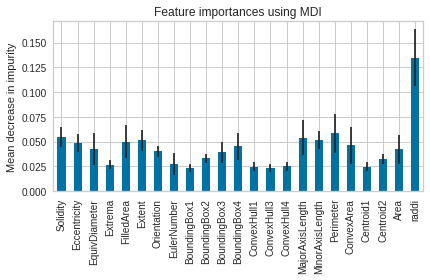

In [29]:
%%time
import time
import numpy as np

num_features = microbeDF.columns[:-1]

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# Plot impurity-based importance
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticks(np.arange(len(num_features)))
ax.set_xticklabels(num_features)
fig.tight_layout()

Feature importance based on feature permutation

Elapsed time to compute the importances: 67.834 seconds


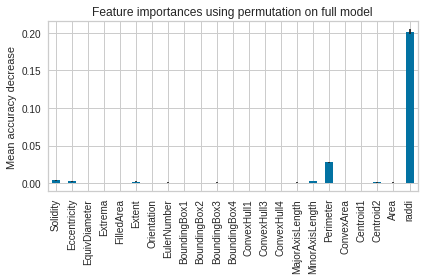

CPU times: user 7.23 s, sys: 1.92 s, total: 9.15 s
Wall time: 1min 8s


In [30]:
%%time 
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Plot the importance ranking
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xticks(np.arange(len(num_features)))
ax.set_xticklabels(num_features)
fig.tight_layout()
plt.show()

### [Feature Selection with Numerical Input Data](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)

Feature 0: 543.0287475585938 - Solidity
Feature 1: 220.66995239257812 - Eccentricity
Feature 2: 1150.9696044921875 - EquivDiameter
Feature 3: 28.058277130126953 - Extrema
Feature 4: 822.8834838867188 - FilledArea
Feature 5: 420.1198425292969 - Extent
Feature 6: 21.27373695373535 - Orientation
Feature 7: 995.3804321289062 - EulerNumber
Feature 8: 46.636558532714844 - BoundingBox1
Feature 9: 29.911985397338867 - BoundingBox2
Feature 10: 828.2567138671875 - BoundingBox3
Feature 11: 1058.40185546875 - BoundingBox4
Feature 12: 42.558223724365234 - ConvexHull1
Feature 13: 45.476341247558594 - ConvexHull3
Feature 14: 44.93679428100586 - ConvexHull4
Feature 15: 940.14599609375 - MajorAxisLength
Feature 16: 869.3492431640625 - MinorAxisLength
Feature 17: 1044.966064453125 - Perimeter
Feature 18: 719.1508178710938 - ConvexArea
Feature 19: 28.700681686401367 - Centroid1
Feature 20: 12.054688453674316 - Centroid2
Feature 21: 913.4406127929688 - Area
Feature 22: 1513.4505615234375 - raddi


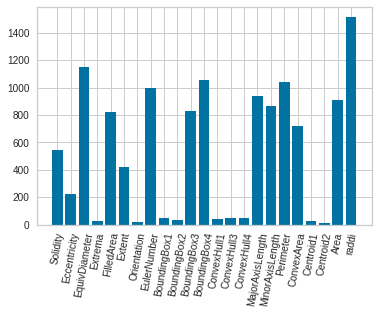

In [31]:
## Feature selection using ANOVA f-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print(f'Feature {i}: {fs.scores_[i]} - {microbeDF.columns[i]}')
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, 
        tick_label=microbeDF.columns[:-1])
plt.xticks(rotation = 80)
plt.show()

Accuracy using all 23 features:

In [26]:
## Feature selection using ANOVA f-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 44.41


Accuracy using top 14 features:

In [27]:
## Feature selection using ANOVA f-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=14)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 42.91


In [28]:
%%time
# compare different numbers of features selected using anova f-test
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
 
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

KeyboardInterrupt: ignored

ANOVA indicates 23 features is best.  
Note: this is not the transformed data.

>1 0.373 (0.006)
>2 0.359 (0.005)
>3 0.348 (0.006)
>4 0.385 (0.008)
>5 0.389 (0.007)
>6 0.407 (0.007)
>7 0.421 (0.006)
>8 0.431 (0.007)
>9 0.441 (0.008)
>10 0.441 (0.008)
>11 0.444 (0.007)
>12 0.460 (0.006)
>13 0.462 (0.007)
>14 0.462 (0.007)
>15 0.461 (0.006)
>16 0.461 (0.006)
>17 0.462 (0.006)
>18 0.462 (0.006)
>19 0.465 (0.005)
>20 0.467 (0.007)
>21 0.471 (0.007)
>22 0.469 (0.007)
>23 0.471 (0.007)


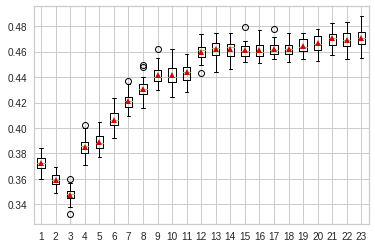

CPU times: user 20.9 s, sys: 2.03 s, total: 22.9 s
Wall time: 29min 42s


In [32]:
%%time
# compare different numbers of features selected using anova f-test
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# # define dataset
# X, y = load_dataset('pima-indians-diabetes.csv')
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline, X, y)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

Best results with including all features. Possibly this could be improved with class balancing (either through initial sampling/resampling or setting to balanced weights in the model) or by using the transformed data.

Note: Only modest increases after 12 features

## Detecting Outliers
MLw/P Cookbook, p69

In [33]:
%%time
# Load libraries
from sklearn.covariance import EllipticEnvelope

# # Data
# num_features = microbeDF.columns[:-1]
# X = microbeDF[num_features].values

# Create Detector
outlier_detector = EllipticEnvelope(contamination=0.01) # roughly 1%

# Fit Detector
outlier_detector.fit(X)

# Predict Outliers
outlier_detector.predict(X)

CPU times: user 21.3 s, sys: 47.7 s, total: 1min 9s
Wall time: 35.7 s


In [34]:
testDF = microbeDF.copy()
testDF['outliers'] = outlier_detector.predict(X)
testDF[testDF['outliers'] != 1]

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms,outliers
4,6.27,20.20,20.10,10.70,14.70,3.970,2.58,11.9,10.20,1.220,...,7.78,6.21,6.800,4.44,14.00,9.55,17.60,7.99,Spirogyra,-1
13,5.62,19.50,18.40,11.60,8.51,4.120,2.08,13.5,6.62,2.360,...,7.30,6.46,10.500,4.12,10.10,9.43,14.70,9.69,Spirogyra,-1
18,3.35,18.30,21.00,8.98,9.33,2.350,20.80,7.2,1.86,0.890,...,10.70,10.70,15.600,8.94,9.02,10.10,19.20,7.00,Spirogyra,-1
586,3.18,20.60,12.90,12.50,3.41,1.710,19.50,18.7,5.44,4.970,...,7.72,5.64,8.200,3.54,8.81,10.90,7.24,6.98,Spirogyra,-1
598,4.37,21.00,12.90,14.40,3.39,2.250,5.22,18.1,11.30,7.890,...,6.22,4.20,9.390,2.60,16.40,13.30,7.24,7.29,Spirogyra,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,1.32,19.30,9.11,12.00,1.52,0.864,20.20,20.7,8.00,1.430,...,8.09,7.30,3.790,4.08,11.00,8.85,3.64,11.40,Ulothrix,-1
30487,2.45,17.90,12.20,17.60,8.16,1.380,17.40,19.8,11.10,6.310,...,6.56,6.83,4.590,4.06,17.40,12.70,6.48,11.40,Ulothrix,-1
30505,2.21,8.73,9.18,15.90,1.46,1.700,19.50,20.9,13.40,7.540,...,5.19,7.97,3.840,2.56,16.20,12.60,3.70,7.15,Ulothrix,-1
30512,2.30,4.59,6.90,7.03,7.57,1.800,11.70,22.7,4.73,0.251,...,4.11,6.69,0.904,1.40,7.03,3.62,2.10,12.10,Ulothrix,-1


In [35]:
%%time
# Look at 1 feature at a time
feature = microbeDF.Solidity

# Create a function to return index of outliers
def indices_of_outliers(x):
  q1, q3 = np.percentile(x, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  return np.where((x > upper_bound) | (x < lower_bound))

# Run function
indices = indices_of_outliers(feature)
indices

CPU times: user 2.66 ms, sys: 0 ns, total: 2.66 ms
Wall time: 2.67 ms


In [36]:
len(indices[0])

0

In [38]:
%%time
counter = 0
for i in microbeDF.columns[:-1]:
  print(f'\n{i}:')
  indices = indices_of_outliers(microbeDF[i])
  print(f' {len(indices[0])} outliers')
  counter += len(indices[0])

print(f'\n\nTOTAL OUTLIERS: {counter}') # Was 21929


Solidity:
 0 outliers

Eccentricity:
 668 outliers

EquivDiameter:
 1107 outliers

Extrema:
 0 outliers

FilledArea:
 2406 outliers

Extent:
 240 outliers

Orientation:
 0 outliers

EulerNumber:
 2403 outliers

BoundingBox1:
 0 outliers

BoundingBox2:
 0 outliers

BoundingBox3:
 1699 outliers

BoundingBox4:
 1646 outliers

ConvexHull1:
 0 outliers

ConvexHull3:
 0 outliers

ConvexHull4:
 0 outliers

MajorAxisLength:
 1448 outliers

MinorAxisLength:
 1887 outliers

Perimeter:
 2258 outliers

ConvexArea:
 3199 outliers

Centroid1:
 0 outliers

Centroid2:
 0 outliers

Area:
 2098 outliers

raddi:
 128 outliers


TOTAL OUTLIERS: 21187
CPU times: user 83.6 ms, sys: 884 µs, total: 84.5 ms
Wall time: 90.3 ms


Increase the range:

In [39]:
# Create a function to return index of outliers
def indices_of_outliers(x):
  q1, q3 = np.percentile(x, [25, 75])
  iqr = q3 - q1
  # 2 instead of 1.5 x IQR:
  lower_bound = q1 - (iqr * 2)
  upper_bound = q3 + (iqr * 2)
  return np.where((x > upper_bound) | (x < lower_bound))

In [41]:
%%time
counter = 0
for i in microbeDF.columns[:-1]:
  print(f'\n{i}:')
  indices = indices_of_outliers(microbeDF[i])
  print(f' {len(indices[0])} outliers')
  counter += len(indices[0])

print(f'\n\nTOTAL OUTLIERS: {counter}') # Was 1711


Solidity:
 0 outliers

Eccentricity:
 150 outliers

EquivDiameter:
 615 outliers

Extrema:
 0 outliers

FilledArea:
 1771 outliers

Extent:
 0 outliers

Orientation:
 0 outliers

EulerNumber:
 1705 outliers

BoundingBox1:
 0 outliers

BoundingBox2:
 0 outliers

BoundingBox3:
 1043 outliers

BoundingBox4:
 952 outliers

ConvexHull1:
 0 outliers

ConvexHull3:
 0 outliers

ConvexHull4:
 0 outliers

MajorAxisLength:
 830 outliers

MinorAxisLength:
 1253 outliers

Perimeter:
 1643 outliers

ConvexArea:
 2624 outliers

Centroid1:
 0 outliers

Centroid2:
 0 outliers

Area:
 1630 outliers

raddi:
 0 outliers


TOTAL OUTLIERS: 14216
CPU times: user 89.6 ms, sys: 4.18 ms, total: 93.7 ms
Wall time: 152 ms


## More Feature Selecction
[Feature Selection: How to Throw Away 95% of Your Features and Get 95% Accuracy](https://towardsdatascience.com/feature-selection-how-to-throw-away-95-of-your-data-and-get-95-accuracy-ad41ca016877)

In [43]:
# pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 67 kB/s 


In [46]:
# !pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.3 MB/s 


In [47]:
%%time
# Feature selection using F-statistic
from sklearn.feature_selection import f_classif
f = f_classif(X_train, y_train)[0]

# Feature selection using mutual information
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)

# Feature selection using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500).fit(X_train, y_train)

# Feature selection using light gbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(
    objective = 'multiclass',
    metric = 'multi_logloss',
    importance_type = 'gain'
).fit(X_train, y_train)

# Feature selection using
import pandas as pd
from mrmr import mrmr_classif
mrmr = mrmr_classif(pd.DataFrame(X_train), pd.Series(y_train), K = 784)

# Create DF to store feature ranking info
ranking = pd.DataFrame(index = range(X_train.shape[1]))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
100%|██████████| 23/23 [00:00<00:00, 24.06it/s]

CPU times: user 45.4 s, sys: 25.2 s, total: 1min 10s
Wall time: 1min 25s


In [50]:
# Store ranking info for each feature from each method
ranking['feat'] = microbeDF.columns[:-1]
ranking['f'] = pd.Series(f, index = ranking.index).fillna(0).rank(ascending = False)
ranking['mi'] = pd.Series(mi, index = ranking.index).fillna(0).rank(ascending = False)
ranking['logreg'] = pd.Series(np.abs(logreg.coef_).mean(axis = 0), index = ranking.index).rank(ascending = False)
ranking['lightgbm'] = pd.Series(lgbm.feature_importances_, index = ranking.index).rank(ascending = False)
ranking['mrmr'] = pd.Series(list(range(1, len(mrmr) + 1)) + [X_train.shape[1]] * (X_train.shape[1] - len(mrmr)), index = mrmr + list(set(ranking.index) - set(mrmr))).sort_index()

ranking = ranking.replace(to_replace = ranking.max(), value = X_train.shape[1])
ranking.to_csv('ranking.csv', index = False)

In [51]:
# Sum the rankings across methods
ranking['total'] = ranking.sum(axis=1)
# Sort by sum to get an overall idea of the most/least useful features
ranking.sort_values('total')

,feat,f,mi,logreg,lightgbm,mrmr,total
22,23,1.0,1.0,15.0,1.0,1,19.0
17,Perimeter,4.0,5.0,6.0,4.0,5,24.0
2,EquivDiameter,2.0,9.0,5.0,13.0,3,32.0
15,MajorAxisLength,6.0,7.0,4.0,7.0,9,33.0
18,ConvexArea,11.0,2.0,7.0,2.0,14,36.0
21,Area,7.0,3.0,1.0,20.0,8,39.0
16,MinorAxisLength,8.0,6.0,11.0,6.0,10,41.0
4,FilledArea,10.0,4.0,18.0,5.0,12,49.0
0,Solidity,12.0,10.0,13.0,3.0,13,51.0
11,BoundingBox4,3.0,20.0,14.0,10.0,6,53.0


In [52]:
%%time
# Load libraries
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Evaluate accuracy vs features using each feaure selection technique
algos = ['f', 'mi', 'logreg', 'lightgbm', 'mrmr']  
ks = [1, 2, 3, 4, 5, 7, 9, 11, 13, 16, 19, 22]

accuracy = pd.DataFrame(index = ks, columns = algos)
roc = pd.DataFrame(index = ks, columns = algos)

for algo in algos:
    
    for k in ks:
    
        cols = ranking[algo].sort_values().head(k).index.to_list()
                
        clf = CatBoostClassifier().fit(
            X_train[:, cols], y_train,
            eval_set = (X_test[:, cols], y_test),
            early_stopping_rounds = 20,
            verbose = False
        )
                
        accuracy.loc[k, algo] = accuracy_score(
            y_true = y_test, y_pred = clf.predict(X_test[:, cols]))
        roc.loc[k, algo] = roc_auc_score(
            y_true = y_test, y_score = clf.predict_proba(X_test[:, cols]), multi_class = 'ovr', average = 'macro')
        
accuracy.to_csv('accuracy.csv', index = True)
roc.to_csv('roc.csv', index = True)

CPU times: user 1h 36min 39s, sys: 1min 1s, total: 1h 37min 41s
Wall time: 52min 9s


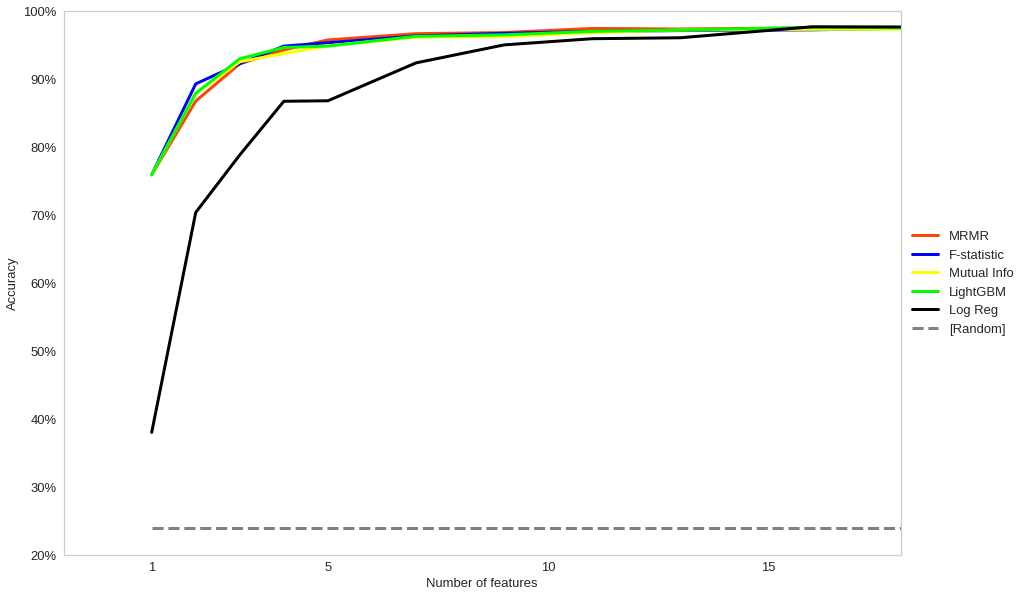

In [53]:
# Set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

# Plot accuracy vs features for each feature selection technique
for algo, label, color in zip(
    ['mrmr', 'f', 'mi', 'lightgbm', 'logreg'],
    ['MRMR', 'F-statistic', 'Mutual Info', 'LightGBM', 'Log Reg'],
    ['orangered', 'blue', 'yellow', 'lime', 'black']):
        plt.plot(accuracy.index, accuracy[algo], label = label, color = color, lw = 3)

plt.plot(
    [1, 20], [pd.Series(y_test).value_counts(normalize = True).iloc[0]] * 2, 
    label = '[Random]', color = 'grey', ls = '--', lw = 3
)

plt.legend(fontsize = 13, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()
plt.yticks(np.linspace(0, 1, 11), ['{:.0%}'.format(i) for i in np.linspace(0, 1, 11)], fontsize = 13)
plt.xticks([1] + list(range(5, 21, 5)), fontsize = 13)
plt.xlim(-1, 18)
plt.ylim(0.20, 1.00)
plt.xlabel('Number of features', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.savefig('accuracy.png', dpi = 300, bbox_inches = 'tight')

# Modeling

In [29]:
# Set up DataFrame to store comparisons
model_compare = pd.DataFrame()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

def get_model_metrics(name, model):
  '''Prints confusion matrix and some metrics; returns metrics in a DF'''
  cols = ['Model', 'Accuracy', 'F1_Score', 'Precision', 'Recall']
    # get predictions
  predictions = model.predict(X_test)
  
  # print confusion matrix
  cm = confusion_matrix(y_test, predictions)
  print(cm)
  
  # get accuracy, f1-score, precision, and recall
  accuracy = round(model.score(X_test, y_test)*100, 2)
  print('Accuracy: ', accuracy)
  cr = classification_report(y_test, predictions, output_dict=True)
  f1Score = round(cr['weighted avg']['f1-score'], 4)
  print('F1-Score: ', f1Score)
  precision = round(cr['weighted avg']['precision'], 4)
  print('Precision:', precision)
  recall = round(cr['weighted avg']['recall'], 4)
  print('Recall:   ', recall)

  df = pd.DataFrame([[name, accuracy, f1Score, precision, recall]],
                    columns=cols)
  return df

## Random Forest

In [31]:
%%time
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create classifier
rfClass = RandomForestClassifier(class_weight='balanced')

# Train model
rfClass.fit(X_train, y_train)

CPU times: user 4.89 s, sys: 29.3 ms, total: 4.92 s
Wall time: 5.54 s


In [32]:
# Evaluate model
tempDF = get_model_metrics('RandomForest', rfClass)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[1203   11    0    6    2    4    0   20   27   16]
 [   0  545    0    0    0    0    0    6    0    0]
 [   0    0  365    0    0    0    0    0    0    0]
 [   2    8    0  425    8    0    2   14    4    0]
 [   0    0    0    0 1259    0    0    0    0    0]
 [   0    0    0    0    0  864    0    0    0    0]
 [   6    8    0    4    0    0  167   20    0    9]
 [  52   25    1   29    5    8    1 2188   61   22]
 [   0    0    0    0    0    0    0    6 1433    0]
 [   0    0    0    0    0    0    0    1    0 1167]]
Accuracy:  96.12
F1-Score:  0.9608
Precision: 0.9617
Recall:    0.9612


## Decision Tree

In [33]:
%%time
# Load libraries
from sklearn.tree import DecisionTreeClassifier

# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(class_weight='balanced')

# Train model
decisiontree.fit(X_train, y_train)

CPU times: user 388 ms, sys: 2 ms, total: 390 ms
Wall time: 392 ms


In [34]:
# Evaluate model
tempDF = get_model_metrics('DecisionTree', decisiontree)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[1217   10    2    7    0    4    1   19   13   16]
 [   0  545    0    6    0    0    0    0    0    0]
 [   0    0  365    0    0    0    0    0    0    0]
 [   4    8    2  417    4    0    2   18    4    4]
 [   0    0    0    0 1259    0    0    0    0    0]
 [   0    0    0    0    0  864    0    0    0    0]
 [   7    7    0    6    2    0  166   18    3    5]
 [  53   52   10   41   16   11   18 2086   55   50]
 [   0    0    6    0    0    0    0    7 1426    0]
 [   2    0    0    4    4    0    0    1    2 1155]]
Accuracy:  94.96
F1-Score:  0.949
Precision: 0.9506
Recall:    0.9496


## Logistic Regression

In [35]:
%%time
# Load libraries
from sklearn.linear_model import LogisticRegression

# Create logistic regression
logit = LogisticRegression(class_weight='balanced',
                           max_iter=1000)

# Train model
logit.fit(X_train, y_train)

CPU times: user 14.5 s, sys: 9.41 s, total: 23.9 s
Wall time: 12.3 s


In [36]:
# Evaluate model
tempDF = get_model_metrics('LogReg', logit)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[304  54 321  37 181 152  83  34  67  56]
 [ 15 240   8 119  12   0  34  41  61  21]
 [ 19  16 239   9  12  13  31  15   9   2]
 [ 15  32  41 322   9   0  22  12   6   4]
 [124 120 102  48 462  70  59  48  92 134]
 [ 19   3  70   0   7 694  46  18   0   7]
 [  4   6   3  12   3   0 160  15   1  10]
 [ 72 202 117  86 121  76 281 758 361 318]
 [ 16 155  63  96  64   0  43 100 758 144]
 [  5  72   2  11  78   1  50  94 156 699]]
Accuracy:  46.34
F1-Score:  0.4616
Precision: 0.5253
Recall:    0.4634


## Gaussian Naive Bayes Classifier

In [37]:
%%time
# Load libraries
from sklearn.naive_bayes import GaussianNB

# Create Gaussian naive Bayes object
nBayes = GaussianNB()

# Fit model
nBayes.fit(X_train, y_train)

CPU times: user 35.1 ms, sys: 0 ns, total: 35.1 ms
Wall time: 36.4 ms


In [38]:
# Evaluate model
tempDF = get_model_metrics('GaussianNB', nBayes)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[ 59 111 258  87  72 493  98   6  63  42]
 [  1 253  14  91  45   4  26  27  36  54]
 [ 15  11 162  17  23 104  22  11   0   0]
 [  8 100  51 159  31   7  51  19  27  10]
 [ 79 162 209  93 179 147 128  24 174  64]
 [  0   0  81  31   8 708  20  16   0   0]
 [  7   8   6   9   5  38 130   4   1   6]
 [ 45 226 224 223 172 168 372 390 271 301]
 [  6 241 109 142 100  20  51  42 589 139]
 [  0 200  62 127  70   0 224  32 103 350]]
Accuracy:  29.78
F1-Score:  0.2818
Precision: 0.401
Recall:    0.2978


## Support Vector Classifier (SVC)

In [39]:
%%time
# Load libraries
from sklearn.svm import SVC

# Create classification model
svc = SVC(class_weight='balanced')

# Fit model
svc.fit(X_train, y_train)

CPU times: user 17.2 s, sys: 76 ms, total: 17.3 s
Wall time: 17.3 s


In [40]:
# Evaluate model
tempDF = get_model_metrics('SVC', svc)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[ 659   99  225   20   79   60   26   28   63   30]
 [   1  428    3   49   13    0   14   14   11   18]
 [  27    0  321    2    9    4    0    2    0    0]
 [  15   49   20  339   11    0    5   19    4    1]
 [  87  114   68   10  839   15   10   40   61   15]
 [  13   17   52    0    0  766    9    7    0    0]
 [   3    7    2   10    3    0  166   13    2    8]
 [  91  220  108  108   87   18   59 1285  225  191]
 [  21  188   62   54   45    0   13   55  944   57]
 [   5   79    1   14   35    0   17   73   68  876]]
Accuracy:  66.2
F1-Score:  0.6702
Precision: 0.7173
Recall:    0.662


## Linear SVC

In [41]:
%%time
# Load libraries
from sklearn.svm import LinearSVC

# Create classification model
linSVC = LinearSVC(class_weight='balanced')

# Fit model
linSVC.fit(X_train, y_train)

CPU times: user 21.6 s, sys: 20.2 ms, total: 21.7 s
Wall time: 21.6 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [42]:
# Evaluate model
tempDF = get_model_metrics('LinearSVC', linSVC)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[ 96  39 404  64 156 217 141  21  89  62]
 [  7 194  17 169  12   0  38  28  56  30]
 [  6  17 218   9  10  26  53   8  15   3]
 [  5  17  37 337   5   0  41   7   6   8]
 [ 22  99 138  71 360 113  91  43 116 206]
 [  7   0  64   0   4 745  31  10   0   3]
 [  1   5   5  15   0   5 160  11   0  12]
 [ 19 141 143 142  73  91 385 510 441 447]
 [  9 103  73 117  56   0  52  58 812 159]
 [  4  50   3  30  51   2  50  71 175 732]]
Accuracy:  41.62
F1-Score:  0.3926
Precision: 0.5079
Recall:    0.4162


## Ada Boost Classifier

In [43]:
%%time
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create classifier
adaboost = AdaBoostClassifier()

# Train model
adaboost.fit(X_train, y_train)

CPU times: user 3.31 s, sys: 11.3 ms, total: 3.32 s
Wall time: 3.32 s


In [44]:
# Evaluate model
tempDF = get_model_metrics('AdaBoost', adaboost)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[ 56 162 453   6 179 333  18  20   9  53]
 [  2 341   1   0  97   0   3  23  11  73]
 [  9  19 261  13   5  35   7   5   0  11]
 [  7 264  66   0  63   2   9  16   2  34]
 [ 95 301 207   0 291 116  17  76  25 131]
 [ 20   0  28   0   0 762  23  21   0  10]
 [  9   7   0   1  38 129  13   5   1  11]
 [ 85 776  83   5 254 261  44 351  95 438]
 [ 31 712  74   5 146  48  11  23 187 202]
 [  0 507   5   5 137  29  10  55  49 371]]
Accuracy:  26.32
F1-Score:  0.2343
Precision: 0.3521
Recall:    0.2632


## MLP Classifier

In [45]:
%%time
# Load libraries
from sklearn.neural_network import MLPClassifier

# Create classification model
mlp = MLPClassifier(early_stopping=True)

# Fit model
mlp.fit(X_train, y_train)

CPU times: user 16.7 s, sys: 12.8 s, total: 29.5 s
Wall time: 16.3 s


In [46]:
# Evaluate model
tempDF = get_model_metrics('MLP', mlp)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[ 636   47  225   27  117   64   37   39   63   34]
 [   1  407    1   48   21    0   15   32   16   10]
 [  12    0  343    0   10    0    0    0    0    0]
 [  11   43   13  338   15    0    9   24    7    3]
 [ 121   46   20    6  948   13   13   22   31   39]
 [  12    0    7    0    0  825    9   11    0    0]
 [   3    4    1    9    7    1  169   12    2    6]
 [  63  142   96  109   99   59   63 1272  270  219]
 [  38  126   57   46   52    2   27  115  884   92]
 [  11   32    3    5   65    0   12   66   61  913]]
Accuracy:  67.32
F1-Score:  0.6715
Precision: 0.7005
Recall:    0.6732


## Gradient Boosting Classifier

In [47]:
%%time
# Load libraries
from sklearn.ensemble import GradientBoostingClassifier

# Create classification model
gbc = GradientBoostingClassifier()

# Fit model
gbc.fit(X_train, y_train)

CPU times: user 1min 31s, sys: 180 ms, total: 1min 31s
Wall time: 1min 31s


In [48]:
# Evaluate model
tempDF = get_model_metrics('GBC', gbc)
# Store metrics
model_compare = pd.concat([model_compare, tempDF], ignore_index=True)

[[ 986   66   26   20   50    9   14   50   41   27]
 [   0  523    0    5    4    0    2    7    3    7]
 [   0    0  365    0    0    0    0    0    0    0]
 [  16   17    4  386   14    0    2   19    1    4]
 [  18    4    0    0 1234    0    0    3    0    0]
 [   0    0    0    0    0  864    0    0    0    0]
 [   7    4    0    7    5    0  178    8    2    3]
 [  88  111   17   68   96    6   42 1707  165   92]
 [  18   67    7   18   21    0    7   56 1192   53]
 [   8   28    0    0    7    0    9   24   27 1065]]
Accuracy:  84.97
F1-Score:  0.8485
Precision: 0.8591
Recall:    0.8497


## Model Comparisons

In [49]:
# Compare model metrics
model_compare.sort_values('Accuracy', ascending=False)

,Model,Accuracy,F1_Score,Precision,Recall
0,RandomForest,96.12,0.9608,0.9617,0.9612
1,DecisionTree,94.96,0.9490,0.9506,0.9496
8,GBC,84.97,0.8485,0.8591,0.8497
7,MLP,67.32,0.6715,0.7005,0.6732
4,SVC,66.20,0.6702,0.7173,0.6620
2,LogReg,46.34,0.4616,0.5253,0.4634
5,LinearSVC,41.62,0.3926,0.5079,0.4162
3,GaussianNB,29.78,0.2818,0.4010,0.2978
6,AdaBoost,26.32,0.2343,0.3521,0.2632


# Hyperparameter Tuning

### Random Forest Classifier

In [50]:
# Load libraries
from sklearn.model_selection import GridSearchCV

# Create classifier
rfc = RandomForestClassifier(random_state=42,
                             class_weight='balanced')

# Get a baseline model
baseline = rfc.fit(X_train, y_train)

# Create range of candidate penalty hyperparameter values
parameter_space = {
    'n_estimators': [30, 100, 300, 1000], 
    'criterion': ['gini', 'entropy'], 
    'max_features': ['sqrt', 'log2', None], 
}
grid = GridSearchCV(rfc, parameter_space, cv=5)

In [51]:
%%time
# Fit models
grid_result = grid.fit(X_train, y_train)

CPU times: user 1h 32min 6s, sys: 10.2 s, total: 1h 32min 16s
Wall time: 1h 31min 51s


In [52]:
# Show best parameters
print('Best parameters found:\n', grid_result.best_params_, '\n')
# Get accuracy scores
baseScore = round(baseline.score(X_test, y_test)*100, 2)
score = round(grid_result.score(X_test, y_test)*100, 2)
print(f"Baseline Accuracy:\t{baseScore}")
print(f"Tuned Accuracy:\t\t{score}")

Best parameters found:
 {'criterion': 'entropy', 'max_features': None, 'n_estimators': 300} 

Baseline Accuracy:	96.3
Tuned Accuracy:		97.01


### Decision Tree Classifier

In [53]:
# Load libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(random_state=42, 
                                      class_weight='balanced')

# Get a baseline model
baseline = decisiontree.fit(X_train, y_train)

# Create range of candidate penalty hyperparameter values
parameter_space = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': [0, 0.1, 0.01, 0.001]
}
grid = GridSearchCV(decisiontree, parameter_space, cv=5)

In [54]:
%%time
# Fit models
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9000 fits failed out of a total of 27000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fail

CPU times: user 31min 6s, sys: 5.56 s, total: 31min 11s
Wall time: 31min 7s


In [55]:
# Show best parameters
print('Best parameters found:\n', grid_result.best_params_, '\n')
# Get accuracy scores
baseScore = round(baseline.score(X_test, y_test)*100, 2)
score = round(grid_result.score(X_test, y_test)*100, 2)
print(f"Baseline Accuracy:\t{baseScore}")
print(f"Tuned Accuracy:\t\t{score}")

Best parameters found:
 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'} 

Baseline Accuracy:	94.8
Tuned Accuracy:		96.04


Fine tune a bit:

In [56]:
# Load libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create decision tree regressor object
decisiontree = DecisionTreeClassifier(random_state=42, 
                                      class_weight='balanced')

# Get a baseline model
baseline = decisiontree.fit(X_train, y_train)

# Create range of candidate penalty hyperparameter values
parameter_space = {
    'criterion': ['entropy'], 
    'splitter': ['best'],
    'max_depth': [None, 1, 10],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': [None],
    'ccp_alpha': [0]
}
grid = GridSearchCV(decisiontree, parameter_space, cv=5)

In [57]:
%%time
# Fit models
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float i

CPU times: user 19.1 s, sys: 24.1 ms, total: 19.2 s
Wall time: 19.1 s


In [58]:
# Show best parameters
print('Best parameters found:\n', grid_result.best_params_, '\n')
# Get accuracy scores
baseScore = round(baseline.score(X_test, y_test)*100, 2)
score = round(grid_result.score(X_test, y_test)*100, 2)
print(f"Baseline Accuracy:\t{baseScore}")
print(f"Tuned Accuracy:\t\t{score}")

Best parameters found:
 {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'} 

Baseline Accuracy:	94.8
Tuned Accuracy:		96.04
